In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log


df = pd.read_csv('../data/curated/ques2data.csv')

In [45]:
df['Type'].unique()

array(['1 bedroom flat', '2 bedroom flat', '3 bedroom flat',
       '2 bedroom house', '3 bedroom house', '4 bedroom house',
       'All properties', nan], dtype=object)

In [46]:
df['Year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [47]:
df.columns

Index(['suburb', 'Year', 'population', 'income', 'Type', 'Median_Price'], dtype='object')

In [48]:
df = df[df['Type']=='All properties']

In [49]:
df.loc[:, 'Median_Price'] = df['Median_Price'].apply(pd.to_numeric, errors='coerce')

In [50]:
df

,suburb,Year,population,income,Type,Median_Price
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490
...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320
10358,Moe,2020,NaN,NaN,All properties,248
10365,Ocean Grove,2020,NaN,NaN,All properties,420
10372,Sale,2020,NaN,NaN,All properties,295


In [51]:
df['Median_Price']

6        450
13       450
20       475
27       495
34       490
        ... 
10351    320
10358    248
10365    420
10372    295
10379    485
Name: Median_Price, Length: 1140, dtype: int64

<AxesSubplot:xlabel='income', ylabel='Median_Price'>

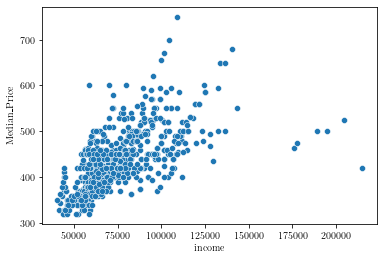

In [52]:
sns.scatterplot(data=df,x='income', y='Median_Price')

In [53]:
df

,suburb,Year,population,income,Type,Median_Price
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490
...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320
10358,Moe,2020,NaN,NaN,All properties,248
10365,Ocean Grove,2020,NaN,NaN,All properties,420
10372,Sale,2020,NaN,NaN,All properties,295


In [54]:
df[df['Type']=='All Properties']

,suburb,Year,population,income,Type,Median_Price


In [55]:
df['annual_price_change'] = df.groupby(['suburb','Type'])['Median_Price'].apply(pd.Series.pct_change)
df['annual_population_change'] = df.groupby(['suburb','Type'])['population'].apply(pd.Series.pct_change)
df['annual_income_change'] = df.groupby(['suburb','Type'])['income'].apply(pd.Series.pct_change)

<AxesSubplot:xlabel='annual_population_change', ylabel='annual_price_change'>

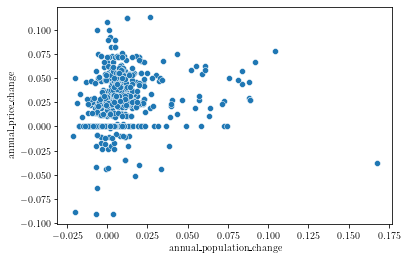

In [56]:
sns.scatterplot(data=df,x='annual_population_change', y='annual_price_change')